# 0. Run the backtest code

In [34]:
# Rb 5min test
!python ../Main.py -o ../Results/Rb_5min_PriceThreshold -c ../Config/Rb_5min_PriceThreshold.json > /dev/null

/home/runmin/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/home/runmin/Documents/Qishi/QishiQR/BacktestEngine/Engine')

import matplotlib.pyplot as plt
from PostProcessing import GetResult
from PostProcessing import OffSetAverage

def PlotResult(TesterResults):
    for ID, tester in enumerate(TesterResults):
        print("Tester=",ID)
        
        params = tester["globalPara"]
        for key, item in tester["localPara"].items():
            print("{} = {}".format(key, item))

        fig, ax = plt.subplots(1,2,figsize=(20,6))
        tester["insample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[0])
        tester["insample"].plot(ax=ax[0])
        tester["outsample"].ensemble.ensembles[0].result.benchmark.plot(ax=ax[1])
        tester["outsample"].plot(ax=ax[1])
        
        ax[0].set_xlabel("Date")
        ax[0].set_title("Equity curve - Insample")
        ax[1].set_xlabel("Datae")
        ax[1].set_title("Equity curve - Outsample")
        plt.show()

    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Rb - 5min 

In [47]:
Rb_5min_result = GetResult("../Results/Rb_5min_PriceThreshold/")


Tester= 0 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_0.pkl

Tester= 1 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_1.pkl

Tester= 2 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_2.pkl

Tester= 3 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_3.pkl

Tester= 4 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_4.pkl

Tester= 5 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_5.pkl

Tester= 6 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_6.pkl

Tester= 7 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_7.pkl

Tester= 8 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_8.pkl

Tester= 9 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_9.pkl

Tester= 10 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_10.pkl

Tester= 11 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_11.pkl

Tester= 12 |file_path =  ../Results/Rb_5min_PriceThreshold/Result_12.pkl

Tester= 13 |file_path =  ../Results/Rb_5min_PriceThreshol

## 1.0 Rb - 5min offset average - group test results by price threshold

In [49]:
NoCost_Result_Group = {10e-4:[],5e-4:[],0:[]}
FixedCost_Result_Group = {10e-4:[],5e-4:[],0:[]}

for result in Rb_5min_result:
    price_threshold = result['localPara']['price_threshold']
    if result['localPara']['fixed_cost']:
        FixedCost_Result_Group[price_threshold].append(result)
    else:
        NoCost_Result_Group[price_threshold].append(result)
    

---
# NO trading cost

## 2.0 Rb - 5min offset average - price threshold = 10bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

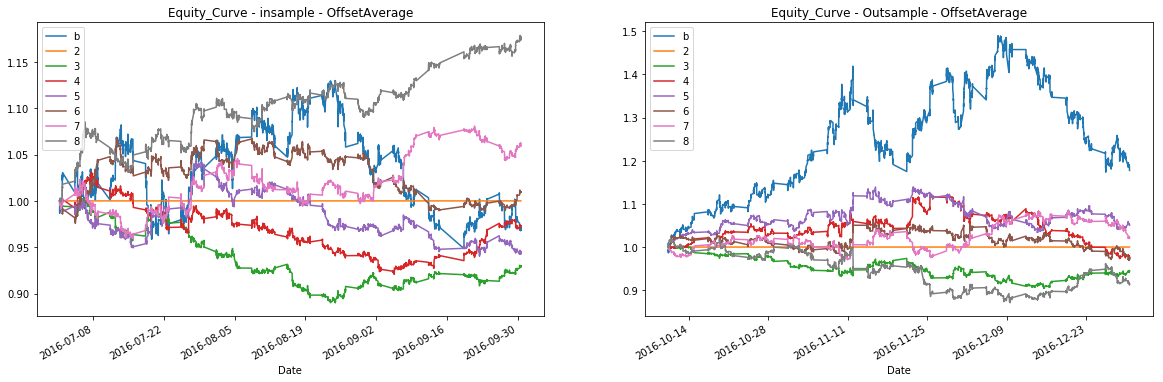

In [55]:
Rb_5min_Offset_Average_10bps = OffSetAverage(NoCost_Result_Group[10e-4])

Benchmark = Rb_5min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = Rb_5min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

In [56]:
Rb_5min_Offset_Average_10bps.GetAvePerformance()['insample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.229238,-0.001126,NaN,NaN,0.004301,-0.008843,0.015049,-0.175700,NaN,-0.972735,93.8,0.933492,0.275758
2,0.297541,-0.000402,-0.007136,0.008644,-0.000099,-0.050141,0.052809,-0.187420,1.224370,-0.308715,193.2,0.975830,0.437390
3,0.302606,-0.000884,-0.005739,0.006787,-0.000093,-0.033660,0.035143,-0.183895,1.183141,-0.695763,312.8,0.946266,0.445706
4,0.301518,0.000192,-0.005201,0.006236,0.000077,-0.030256,0.033038,-0.200521,1.216599,0.221361,386.0,1.019766,0.454378
5,0.313835,0.000945,-0.004361,0.005151,0.000114,-0.024467,0.028625,-0.138851,1.183429,0.798319,528.4,1.051149,0.462543
6,0.300411,0.002565,-0.004293,0.004796,0.000297,-0.027067,0.036320,-0.123419,1.125008,2.219904,553.4,1.177350,0.499315


In [58]:
Rb_5min_Offset_Average_10bps.GetAvePerformance()['outsample']

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,1.0,1.000000,0.000000
1,0.342079,-0.000881,NaN,NaN,-0.025837,-0.109816,0.061863,-0.218310,NaN,-0.480700,125.4,0.949399,0.179677
2,0.423540,-0.000348,-0.008447,0.009422,-0.000285,-0.057787,0.054127,-0.228537,1.149649,-0.240712,285.0,0.968550,0.453671
3,0.421387,0.000908,-0.006530,0.007772,0.000179,-0.040982,0.050239,-0.253979,1.197064,0.523774,425.0,1.063248,0.461702
4,0.393600,-0.000327,-0.005948,0.007288,-0.000045,-0.042842,0.049103,-0.224194,1.231700,-0.086015,495.2,0.967523,0.440146
5,0.426738,0.000447,-0.005462,0.005967,0.000044,-0.044033,0.038729,-0.196201,1.094348,0.390804,646.8,1.025529,0.475161
6,0.448099,-0.001431,-0.005740,0.005941,-0.000135,-0.047911,0.040857,-0.261704,1.036880,-0.799612,618.6,0.903133,0.474191


## 2.1  Rb - 5min offset average - price threshold = 5bps

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

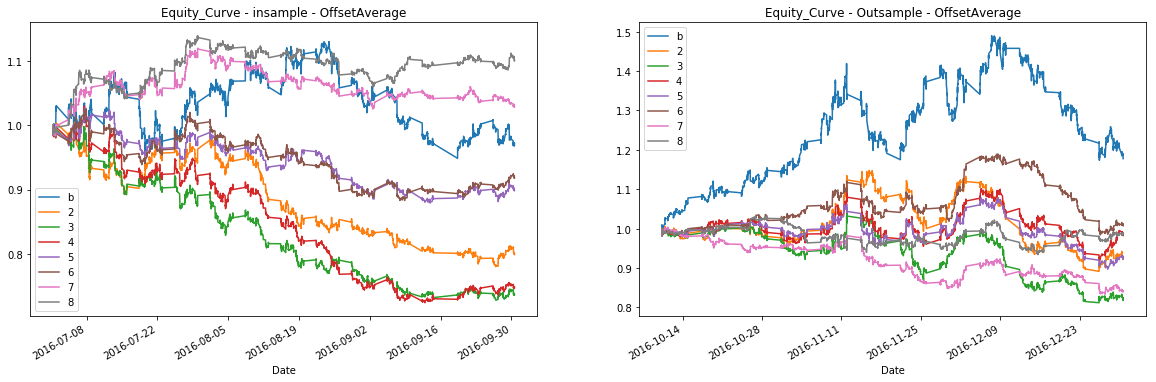

In [59]:
Rb_5min_Offset_Average_5bps = OffSetAverage(NoCost_Result_Group[5e-4])

Benchmark = Rb_5min_Offset_Average_5bps.GetBenchmark()
AveEqCurve = Rb_5min_Offset_Average_5bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

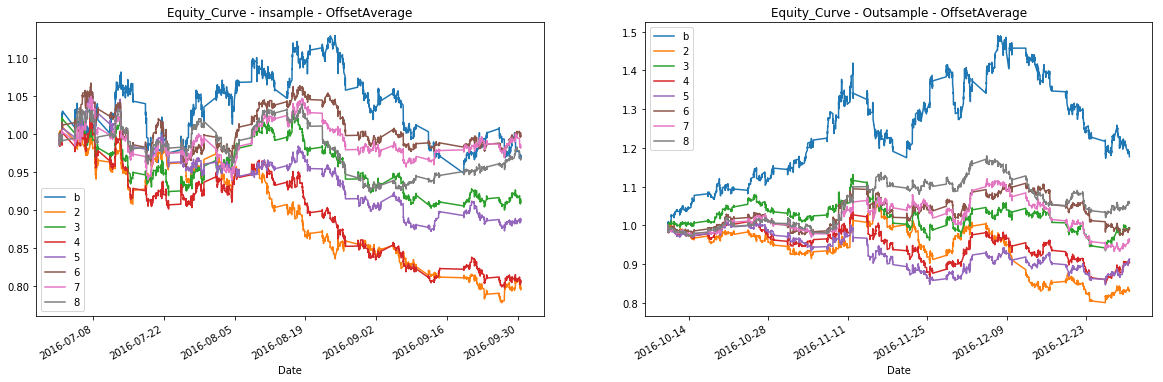

In [60]:
Rb_5min_Offset_Average_0bps = OffSetAverage(NoCost_Result_Group[0e-4])

Benchmark = Rb_5min_Offset_Average_0bps.GetBenchmark()
AveEqCurve = Rb_5min_Offset_Average_0bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')

---

# Fixed Trading Cost
## 3.0 Rb - 5min offset average - price threshold = 10bps - Fixed cost


Text(0.5,1,'Equity_Curve - Outsample - OffsetAverage')

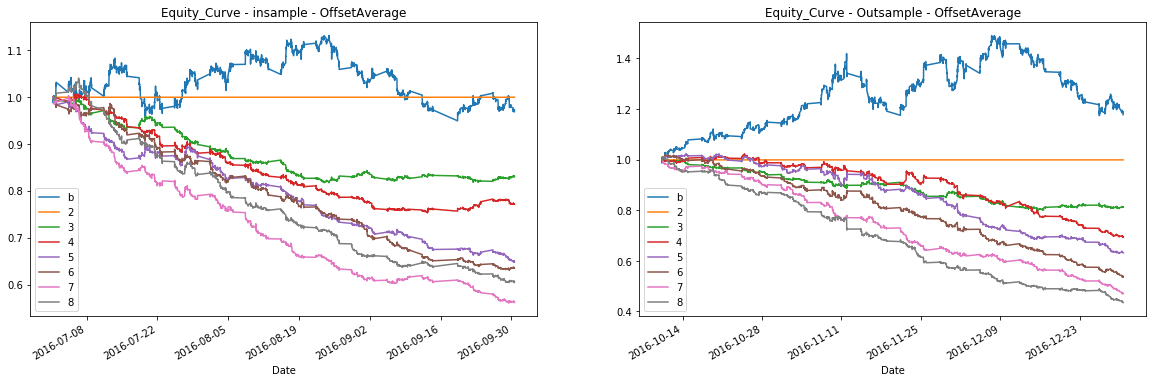

In [61]:
FixedCost_Rb_5min_Offset_Average_10bps = OffSetAverage(FixedCost_Result_Group[10e-4])

Benchmark = FixedCost_Rb_5min_Offset_Average_10bps.GetBenchmark()
AveEqCurve = FixedCost_Rb_5min_Offset_Average_10bps.GetAveEquityCurve()

# Plot
fig, ax = plt.subplots(1,2, figsize=(20,6))
Benchmark['insample'].plot(ax=ax[0],label='b')
AveEqCurve['insample'].plot(ax=ax[0])
ax[0].legend(['b',2,3,4,5,6,7,8])
ax[0].set_title('Equity_Curve - insample - OffsetAverage')

Benchmark['outsample'].plot(ax=ax[1],label='b')
AveEqCurve['outsample'].plot(ax=ax[1])
ax[1].legend(['b',2,3,4,5,6,7,8])
ax[1].set_title('Equity_Curve - Outsample - OffsetAverage')